In [249]:
from src.utils import Triangle, Vertex
from src.constraints import Simplicial2DConstraint, PDConstraint
from src.solver import ProjectiveDynamicsSolver

import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [250]:
vertices = [
    Vertex(
        position=np.array([1.0, 0.0, 0.0]),
        velocity=np.array([0.0, 0.0, 0.0]),
        mass=1.0,
        external_force=np.array([0.0, 0.0, 0.0]),
    ),
    Vertex(
        position=np.array([3.0, 0.0, 0.0]),
        velocity=np.array([0.0, 0.0, 0.0]),
        mass=1.0,
        external_force=np.array([0.0, 0.0, 0.0]),
    ),
    Vertex(
        position=np.array([1.0, 3.0, 3.0]),
        velocity=np.array([0.0, 0.0, 0.0]),
        mass=1.0,
        external_force=np.array([0.0, 0.0, 0.0]),
    ),
    Vertex(
        position=np.array([3.0, 4.0, 4.0]),
        velocity=np.array([0.0, 0.0, 0.0]),
        mass=1.0,
        external_force=np.array([0.0, 0.0, 0.0]),
    ),
]

triangles = [
    Triangle(0, 1, 2),
    Triangle(0, 1, 3),
]

In [251]:
rotation = Rotation.from_euler('x', 45, degrees=True)

constraints: list[PDConstraint] = [
    Simplicial2DConstraint(
        triangle=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
]

In [266]:
solver = ProjectiveDynamicsSolver(
    vertices,
    constraints,
    0.1
)

In [273]:
solver.q, solver.v

(array([[ 3.88666617,  1.69186301,  1.69186302],
        [ 1.13328688,  4.55867768,  4.55867768],
        [ 4.12061576,  1.57802984,  1.57802984],
        [-1.14056881, -0.82857053, -0.82857053]]),
 array([[-0.30400177, -0.10061855, -0.10061855],
        [ 0.66084886,  0.84046693,  0.84046693],
        [-1.11664352, -0.60923589, -0.60923589],
        [ 0.75979643, -0.13061249, -0.13061249]]))

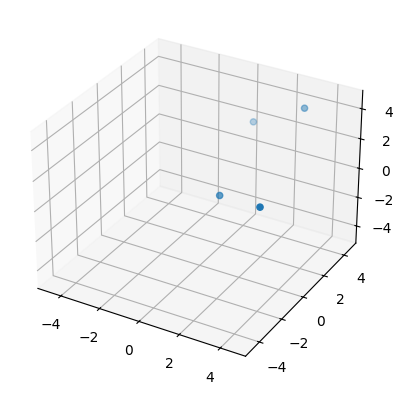

In [267]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(solver.q[:, 0], solver.q[:, 1], solver.q[:, 2], marker="o")

In [268]:
for _ in range(200):
    solver.perform_step(200)

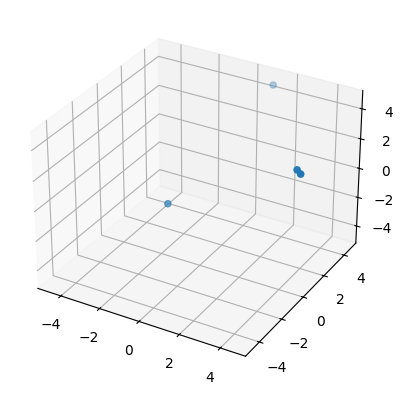

In [269]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(solver.q[:, 0], solver.q[:, 1], solver.q[:, 2], marker="o")

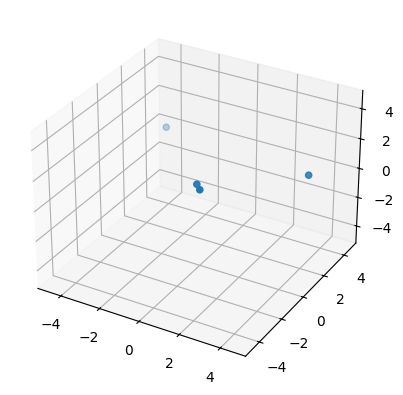

In [270]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(constraints[0].initial_positions[:, 1], constraints[0].initial_positions[:, 2], marker="o")

In [271]:
import scipy as sp
sp.spatial.distance.pdist(constraints[0].initial_positions)

array([5.        , 0.5       , 6.        , 5.02493781, 7.81024968,
       5.5       ])

In [272]:
sp.spatial.distance.pdist(solver.q)

array([4.90085198, 0.28398661, 6.16265058, 5.16649368, 7.95080538,
       6.26606047])